# 0. Introduction 


PennyLane is an open-source software platform for differentiable quantum computing, developed by Xanadu.

# 1.  Circuit basics: circuit, device and QNode
 Let's start by importing PennyLane and Numpy 

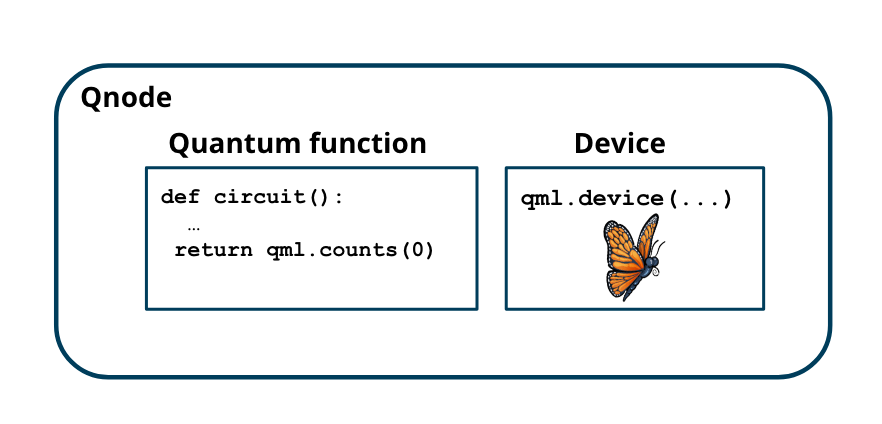

In [1]:
import pennylane as qml
import numpy as np

### Circuit
In PennyLane, a **circuit** is represented by a **quantum function**. A quantum function is a Python function that must contain one or more quantum operations (gates) and return one or more quantum measurements.

In [2]:
def quantum_function():
    qml.Hadamard(wires=0)
    return qml.state()

In [3]:
quantum_function()

state(wires=[])

### Device (machine)
To create a quantum circuit, you need to specify the device on which the circuit will run ('[device](https://docs.pennylane.ai/en/stable/code/qml_devices.html)'). Any computational object that can apply quantum operations and return a measured value is a quantum device, whether it's quantum hardware (MonarQ) or a quantum simulator (`default.qubit`, `lightning.qubit`).

In PennyLane, `wires` refers to the number of qubits. By default, qubits are initialized to state $\vert 0 \rangle$. If you have three wires, then your initial state is $\vert 000 \rangle$.

In [13]:
#"default.qubit" is a standard quantum simulator
dev = qml.device('default.qubit', wires = 1) 

### Qnode
To perform a quantum calculation, you need a [QNode](https://docs.pennylane.ai/en/stable/code/api/pennylane.QNode.html). A QNode is an abstract encapsulation of a quantum function, described by a quantum circuit. It links the quantum circuit to the machine. QNodes can be easily created using the `qnode` decorator `@qml.qnode(dev)`.

For example, let's take the quantum circuit from notebook 1, where we applied a Hadamard gate to a qubit. In notebook 1, we manipulated the qubit by multiplying a matrix (H) with the vector $\vert 0 \rangle$. We're now going to run the circuit on a PennyLane device via a QNode.

In [14]:
@qml.qnode(dev) # qnode decorator
def quantum_function():
    qml.Hadamard(wires=0)
    return qml.state()

In [15]:
quantum_function()

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

### Hilbert space (optional)

In a system of **$n$ qubits**, the associated Hilbert space is of dimension $2^n$, which means that the quantum state is represented by a vector of size $2^n$.  

Here, with **two qubits**, our state vector belongs to a space of dimension $2^2 = 4$, which explains why it contains **four probability amplitudes**, corresponding to the four states of the canonical basis:  

$$
\vert 00 \rangle, \vert 01 \rangle, \vert 10 \rangle, \vert 11 \rangle.
$$


In [16]:
from print_latex import print_state_vector
state = quantum_function()
print_state_vector(state)

$$\left|\psi\right\rangle = (0.707107) \left|{0}\right\rangle + (0.707107) \left|{1}\right\rangle$$

The `draw_mpl` function displays the circuit created by the `quantum_function()` function.

(<Figure size 400x200 with 1 Axes>, <Axes: >)


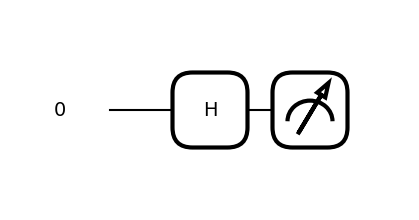

In [17]:
result = qml.draw_mpl(quantum_function)()
print(result)

# 2.  Quantum gates

In notebook 1, we saw how to apply the **Hadamard gate** to a qubit using matrix multiplication. More generally, any quantum operation corresponds to a **unitary matrix**, i.e. a matrix $U$ that satisfies $U^\dagger U = I$. This ensures that the evolution of a quantum state preserves normalization.  

PennyLane facilitates this manipulation with a number of [quantum gates](https://docs.pennylane.ai/en/stable/introduction/operations.html#qubit-operators). Some gates act on a single qubit (like the Hadamard gate or rotations), while others affect several qubits (like the CNOT gate). Let's focus on a few important gates. 


1) **X gate**
 
The $X$ gate flips the state of a qubit, analogous to the classical $NOT$ gate. If the qubit is in the $\vert 0 \rangle$ state, it switches to the $\vert 1 \rangle$ state and vice versa.
$$X \vert 0 \rangle = \vert 1 \rangle$$
$$X \vert 1 \rangle = \vert 0 \rangle$$

2) **Hadamard gate**
 
The Hadamard gate puts a qubit into an equal superposition. 
$$H\vert 0 \rangle = \frac{1}{\sqrt{2}}(\vert 0 \rangle + \vert 1 \rangle)$$
$$H\vert 1 \rangle = \frac{1}{\sqrt{2}}(\vert 0 \rangle - \vert 1 \rangle)$$

Let's try it in a circuit!

In [18]:
dev = qml.device('default.qubit', wires = 1)
@qml.qnode(dev)
def circuit():
    qml.X(wires = 0 )
    qml.Hadamard(wires = 0)
    return qml.state()

What will this function return? Take a second to think about it, then display the quantum state in Dirac notation.
(Note that the qml.state() function will return the complete state, not the sampled probability distribution. More on this in section 3).

In [19]:
print_state_vector(circuit())

$$\left|\psi\right\rangle = (0.707107) \left|{0}\right\rangle + (-0.707107) \left|{1}\right\rangle$$

We started with a single qubit, $\vert 0 \rangle$ and applied an $X$ gate,
$$X \vert 0 \rangle = \vert 1 \rangle$$
Then we applied a Hadamard gate,
$$H \vert 1 \rangle = \frac{1}{\sqrt{2}}(\vert 0 \rangle - \vert 1 \rangle)$$

We have created a superposition. With only one qubit, we now have access to states $\vert 0 \rangle$ and $\vert 1 \rangle$.

3) **CNOT gate**
   
The $CNOT$ gate performs an $X$  operation on a target qubit only if a control qubit is in the $\vert 1 \rangle$ state. If the control qubit is in the $\vert 0 \rangle$ state, both qubits remain unchanged.
$$CNOT \vert 00 \rangle = \vert 00 \rangle$$
$$CNOT \vert 01 \rangle = \vert 01 \rangle$$
$$CNOT \vert 10 \rangle = \vert 11 \rangle$$
$$CNOT \vert 11 \rangle = \vert 10 \rangle$$

In [ ]:
dev = qml.device('default.qubit', wires = 2)
@qml.qnode(dev)
def circuit():
    qml.X(wires = 0) 
    qml.CNOT(wires = [0,1]) #0 is the control qubit and 1 is the target qubit
    return qml.state()

print_state_vector(circuit())

We are working with two qubits so we started in state $\vert 00 \rangle$ and then applied an X gate on the first qubit (index 0),
$$X\vert 00 \rangle = \vert 10 \rangle $$
Then we applied the CNOT gate with the first qubit as the control and the second qubit as the target
$$ CNOT \vert 10 \rangle  = \vert 11 \rangle$$
This example is trivial. We could have just applied two $X$ gates. However, we will see that CNOT gates are very useful for entangling states.

### Quantum gate cheat sheet

The following table summarizes different quantum gates, including their circuit representations, matrix forms, and actions on computational basis states. You can use it as a reference.

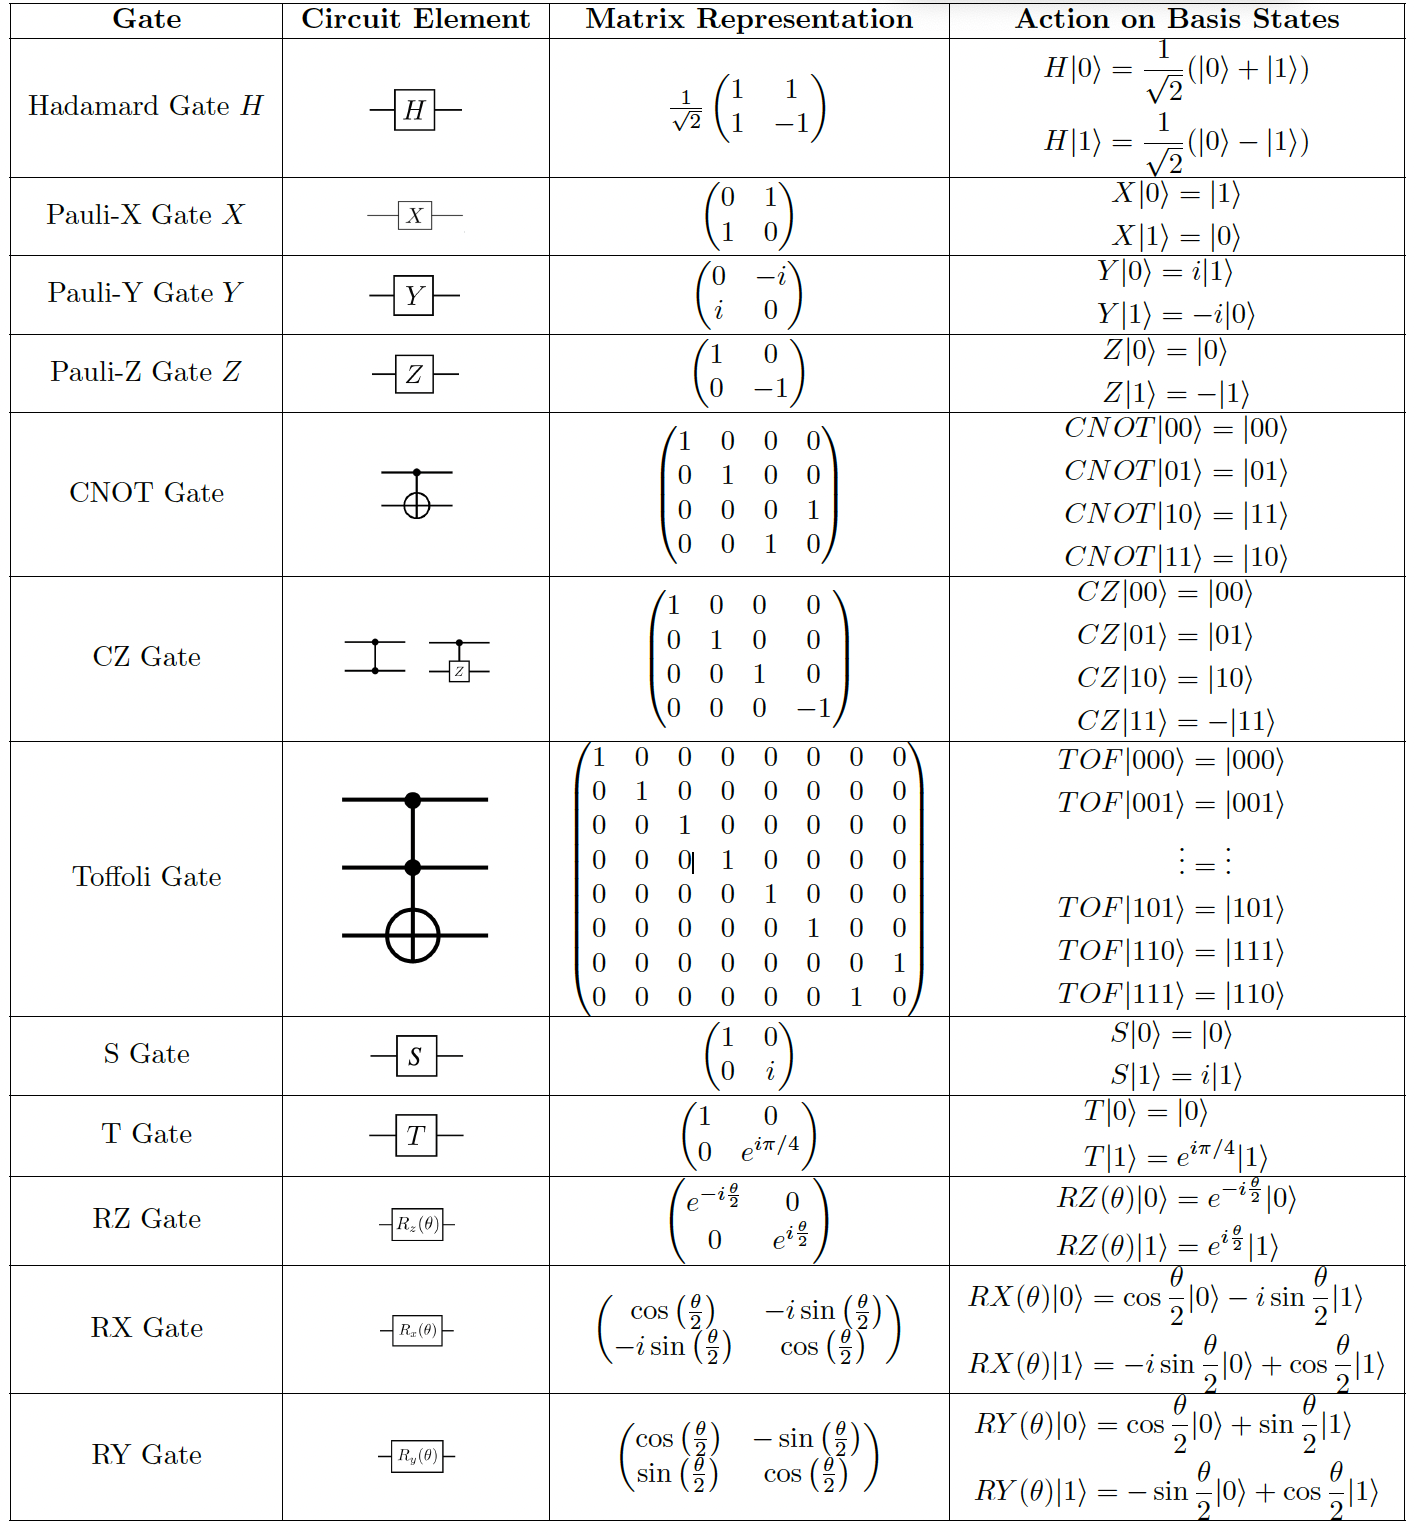

EXERCISE #1

---


Create the following circuit by adding gates to the `circuit()` function.
Don't forget to define a machine (`device`) and to link the machine and the circuit with a `QNode`.

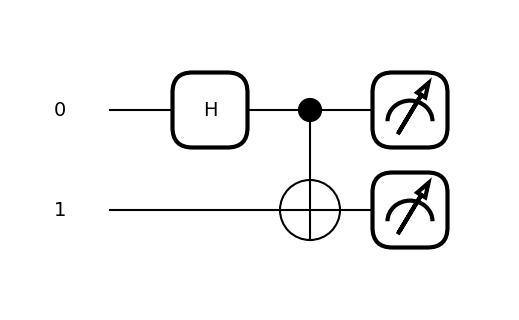

In [ ]:
# YOUR CODE HERE 
def circuit():
    # YOUR CODE HERE 
    return qml.state()

This is a Bell state, a state with two maximally entangled qubits. You'll see the other Bell states in the next exercises.

In [ ]:
print_state_vector(circuit())

# 3.  Preparing states

The first step in many algorithms is to prepare the quantum states of a qubit. We want to bring the qubit into a specific target state, so we need to figure out the sequence of operations required to transform it from its initial state. This sequence of operations must be as small as possible.


EXERCISE #2

---

Add gates to the functions below to create the following three Bell states defined below. Don't forget to define a `device` and to link the device and the circuit with a `QNode`.

a) $$\vert\phi_- \rangle = \frac{1}{\sqrt{2}}(\vert 00 \rangle - \vert 11 \rangle)$$

In [ ]:
# YOUR CODE HERE 
def phi_moins():
    # YOUR CODE HERE 
    return qml.state()

#modify with function to view resulting state
#print_state_vector(phi_moins())

b)
$$\vert\psi_+ \rangle = \frac{1}{\sqrt{2}}(\vert 01 \rangle + \vert 10 \rangle)$$

In [7]:
# YOUR CODE HERE 
def psi_plus():
    # YOUR CODE HERE 
    return qml.state()
    
#modify with function to view resulting state
#print_state_vector(psi_plus())

c) 
$$\vert\psi_- \rangle = \frac{1}{\sqrt{2}}(\vert 01\rangle - \vert 10 \rangle)$$

In [4]:
# YOUR CODE HERE 
def psi_minus():
    # YOUR CODE HERE 
    return qml.state()
    
#modify with function to view resulting state
#print_state_vector(psi_minus())

EXERCISE #3 

---
a) 
Create the following state by finding the exact gate needed.

$$\vert \psi \rangle = \frac{\sqrt{3}}{2}\vert 0\rangle-\frac{i}{2}\vert 1 \rangle$$

Hint : Go through the quantum gate cheat sheet and look for a single-qubit gate that creates an arbitrary superposition.

In [ ]:
dev = qml.device('default.qubit', wires=1)
@qml.qnode(dev)
def prepare_with_gate():
    #YOUR CODE HERE
    return qml.state()
print_state_vector(prepare_with_gate())

b) Now, instead of finding the appropriate gate, use the function [`qml.StatePrep()`](https://docs.pennylane.ai/en/stable/code/api/pennylane.StatePrep.html) to prepare the state.

In [ ]:
state = []#YOUR CODE HERE

@qml.qnode(dev)
def prepare_with_statePrep(state):
    #YOUR CODE HERE
    return qml.state()

print_state_vector(prepare_with_statePrep(state))

# 4.  Measurement

We know how to manipulate the state of qubits with quantum gates. When solving a problem with a quantum computer, we need to extract information from the system after manipulating it. These are measurements and they are returned at the end of your quantum circuit. PennyLane can extract different types of [measurement results](https://docs.pennylane.ai/en/stable/introduction/measurements.html) but careful, not all the functions are available on actual hardware! Some only work in simulation.

Let's use our two qubit Bell pair to study different types of measurements.
$$\vert\psi \rangle = \frac{1}{\sqrt{2}}(\vert 00 \rangle + \vert 11 \rangle)$$

In [23]:
def bell():
    qml.Hadamard(0)
    qml.CNOT([0,1])

# State (qml.state)

The state measure (`qml.state()`) gives us the most complete output possible, i.e. the complete wave function in the computational basis. It accepts no observables and returns a pure state. When running a circuit on real hardware like MonarQ rather than in a simulation, this function is not available.

In [24]:
dev = qml.device('default.qubit', wires = 2)
@qml.qnode(dev)
def bell_statevector():
    bell()
    return qml.state()
    
print(bell_statevector())

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


Why are there four entries? Our Bell pair is in the 2 qubit basis. In other words, 
$$\vert\psi \rangle = \frac{1}{\sqrt{2}}\vert 00 \rangle + 0 \vert 01\rangle + 0 \vert 10 \rangle + \frac{1}{\sqrt{2}}\vert 11 \rangle$$


For convenience, you can use the helper function `print_state_vector`.

In [25]:
print_state_vector(bell_statevector())

$$\left|\psi\right\rangle = (0.707107) \left|{00}\right\rangle + (0.707107) \left|{11}\right\rangle$$

# Probabilities (qml.probs)

In quantum computing, measurement is probabilistic. Recall that for a given state 
$$\vert \psi \rangle  = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$$
the probability of measuring $\vert 0 \rangle$ is $\vert \alpha\vert^2 = \alpha \alpha^* $ and the probability of measuring $\vert \beta \vert^2 = \vert 1 \rangle$ is $\beta \beta^* $ where the * denotes the complex conjugate.

In [26]:
dev = qml.device('default.qubit',wires = 2)
@qml.qnode(dev)
def bell_probs():
    bell()
    return qml.probs()
    #return qml.probs(wires = 0) It can be useful to only specify one wire as needed

print(bell_probs())

[0.5 0.  0.  0.5]


Why are there four entries? Our Bell pair is in the 2 qubit basis. In other words, 
$$\vert\psi \rangle = \frac{1}{\sqrt{2}}\vert 00 \rangle + 0 \vert 01\rangle + 0 \vert 10 \rangle + \frac{1}{\sqrt{2}}\vert 11 \rangle$$

In other words, there is a 50% chance of measuring the state $\vert 00 \rangle$ and a 50% chance of measuring the state $\vert 11 \rangle$. there is a 0% chance of measuring the state $\vert 01 \rangle$ and $\vert 10 \rangle $.

# Sample (qml.sample)

These are nice, but they were all computed exactly. In reality, in an experiment we usually obtain a set of real measurements sampled from the probabilities of $\vert \psi \rangle$, the qubit state. In this case, the actual qubit state $\vert \psi \rangle $ is not accessible, but we can "cheat" as we simulate our circuit in the classical way.


So, if we want to mimic a quantum computer, we can output a set of measurements from the resulting state. To do this, we use the function `qml.sample()`, for which we need to specify the number of samples ('shots') when defining the machine.

In [27]:
dev = qml.device('default.qubit', wires = 2, shots = 10)
@qml.qnode(dev)
def bell_sample():
    bell()
    return qml.sample(wires = [0,1])

print(bell_sample())

[[0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]


# Counts (qml.counts)

This can be hard to read so it is useful to return the counts of each basis state instead.

In [28]:
dev = qml.device('default.qubit', wires = 2, shots = 10)
@qml.qnode(dev)
def bell_counts():
    bell()
    return qml.counts()

result = bell_counts()
print(result)

{'00': tensor(4, requires_grad=True), '11': tensor(6, requires_grad=True)}


# Expectation value (qml.expval) (optional)

Expectation value is a way of measuring the “average” result of a quantum measurement if we were to repeat the experiment several times. Instead of returning a single measurement result (such as 0 or 1), the expectation value tells us the tendency of a quantum state to align itself with a particular measurement direction - in the example below, along the Z axis of the Bloch sphere.

In [29]:
@qml.qnode(dev)
def bell_expvalZ():
    bell()
    return qml.expval(qml.PauliZ(wires = [0]))

print(bell_expvalZ())

0.4


If the result is +1, this means that the qubit is entirely in the state aligned with the Z axis of the Bloch sphere (|0⟩).
If the result is -1, the qubit is in the opposite state along the Z axis of the Bloch sphere (|1⟩).

On real quantum hardware like MonarQ, all measurements are stochastic. You must therefore always specify the number of shots. For the moment, the limit on MonarQ is 1000 shots per experiment. The measures available on MonarQ are `qml.counts`, `qml.sample`, `qml.probs` and `qml.expval`.